## Generate Synthetic Data dengan 3 Fitur

In [3]:
from sklearn.datasets import make_regression
import pandas as pd

# 1. Generate data 
x, y, coef = make_regression(
    n_samples=500,
    n_features=3,
    noise=10,
    coef=True,
    random_state=42
)

# 2. Jadi dataframe 
df = pd.DataFrame(x, columns=["size_sqft", "bedrooms", "age_years"])
df["price_k"] = y # target dalam ribuan unit mata uang

# 3. 5 baris pertama 
df.head()

,size_sqft,bedrooms,age_years,price_k
0,-0.825497,-0.321386,0.412931,-31.819734
1,-1.146345,0.302635,-0.754276,-55.378137
2,-1.377669,-0.937825,0.515035,-89.981142
3,0.599929,1.530751,1.218762,179.009877
4,0.638730,-1.143005,1.633432,15.420390


- **size_sqft** = luas dalam square feet  
- **bedrooms** = jumlah kamar tidur  
- **age_years** = umur bangunan dalam tahun  
- **price_k** = harga (dalam ribuan)  


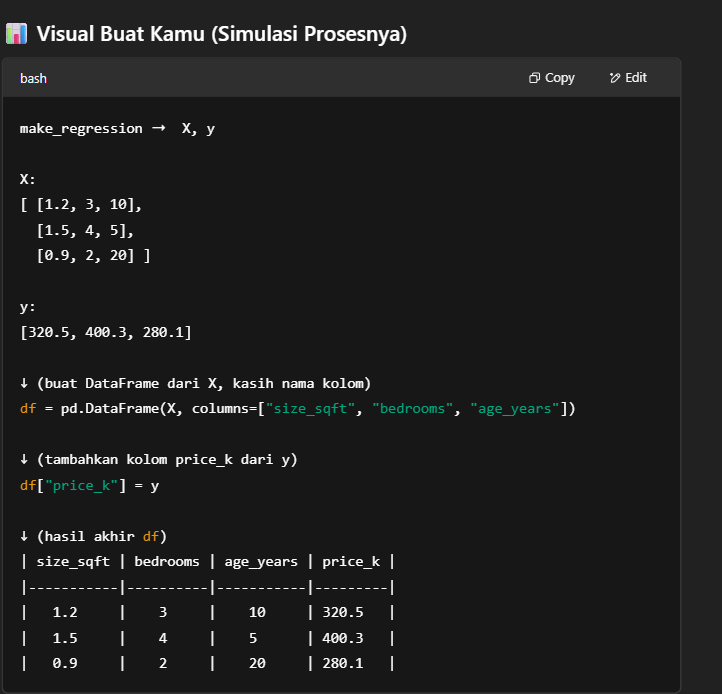

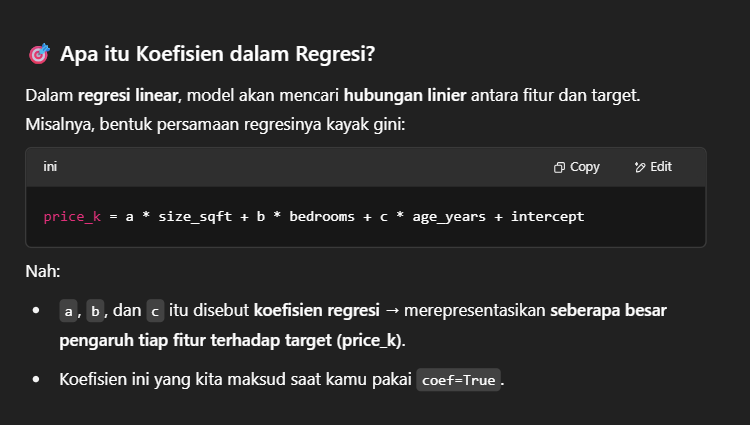

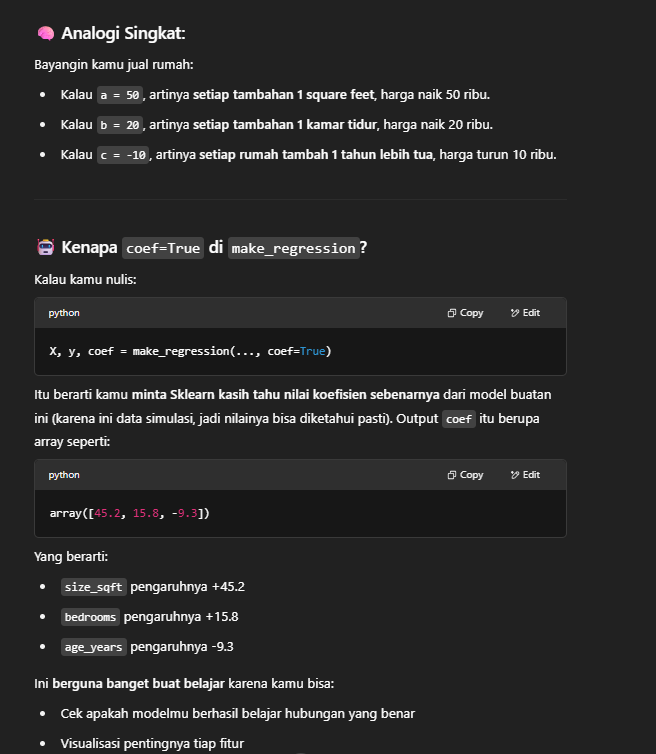

## EDA Ringkas

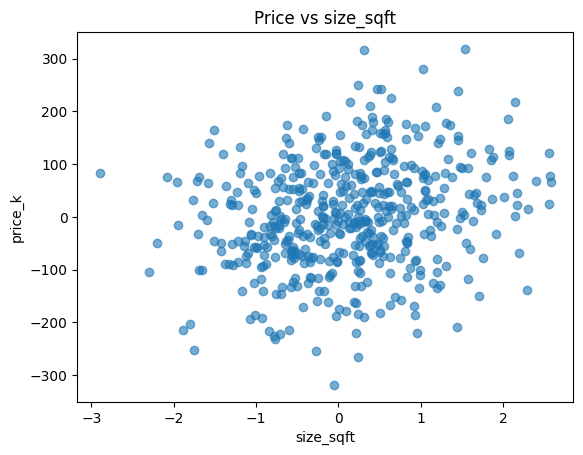

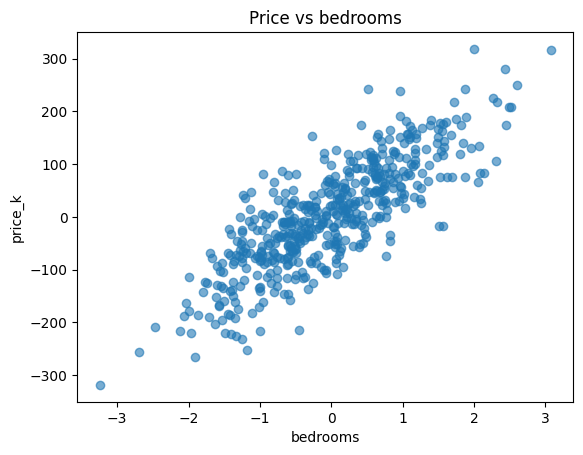

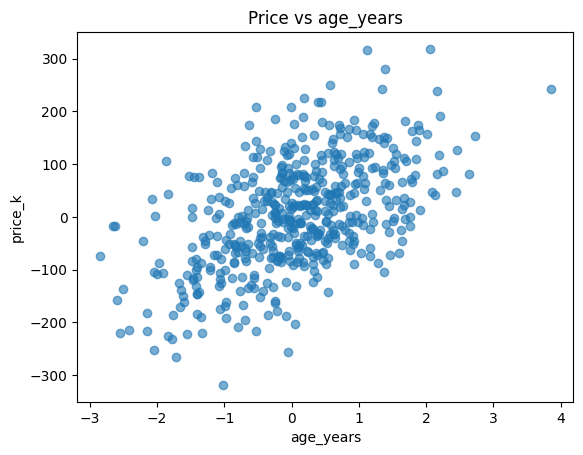

In [4]:
import matplotlib.pyplot as plt

for col in ["size_sqft", "bedrooms", "age_years"]:
    plt.figure()
    plt.scatter(df[col], df["price_k"], alpha=0.6) # nilai alpha kalau kamu ubah akan ngaruh ke ketebalan nya 
    plt.title(f"Price vs {col}")
    plt.xlabel(col)
    plt.ylabel("price_k")
    plt.show()

- Dari scatter plot, kamu bisa lihat seberapa linear masing-masing hubungan.

- Ini memperkuat pemahaman mengapa kita pakai Linear Regression.



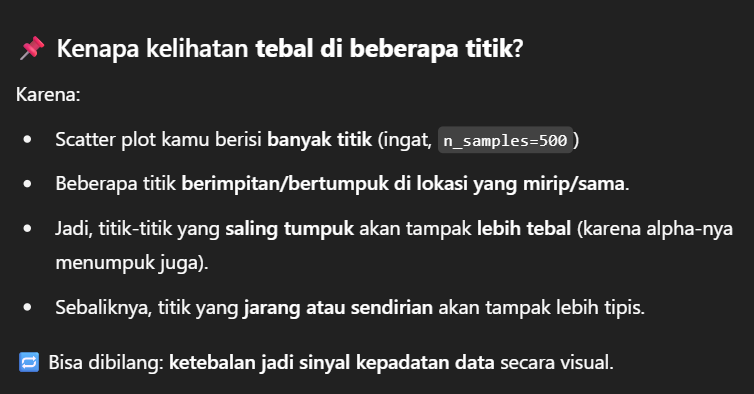

## Training Model Sederhana 

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

# Split
x_train, x_test, y_train, y_test = train_test_split(
    df[["size_sqft", "bedrooms", "age_years"]],
    df["price_k"],
    test_size=0.2,
    random_state=42
)

# Fit 
model = LinearRegression()
model.fit(x_train, y_train)

# Evaluasi 
y_pred = model.predict(x_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse:.2f} ribu")
print("Koefisien model:", dict(zip(
    ["size_sqft", "bedrooms", "age_years"],
    model.coef_
)))

print("="*40)
print("📊 Evaluasi Model Linear Regression")
print("="*40)

print(f"🔍 RMSE (Root Mean Squared Error): {rmse:.2f} ribu\n")

print("📈 Koefisien (Pengaruh Fitur terhadap Harga):")
for feature, coef in zip(["size_sqft", "bedrooms", "age_years"], model.coef_):
    print(f"- {feature:<12}: {coef:>8.2f} (ribu per unit)")

print("="*40)


RMSE: 10.19 ribu
Koefisien model: {'size_sqft': np.float64(26.70129227321487), 'bedrooms': np.float64(83.20981102640076), 'age_years': np.float64(50.028504373782845)}
📊 Evaluasi Model Linear Regression
🔍 RMSE (Root Mean Squared Error): 10.19 ribu

📈 Koefisien (Pengaruh Fitur terhadap Harga):
- size_sqft   :    26.70 (ribu per unit)
- bedrooms    :    83.21 (ribu per unit)
- age_years   :    50.03 (ribu per unit)


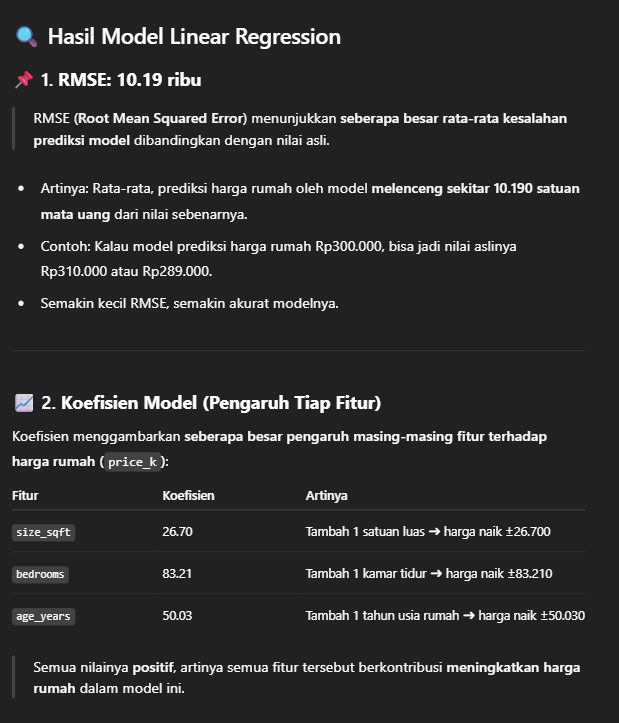

## Visualisasi

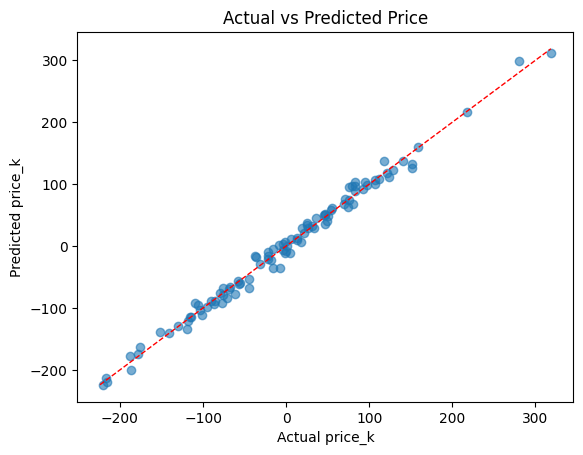

In [6]:
import matplotlib.pyplot as plt 
import numpy as np

# 1. Actual vs Predicted
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.6)
# garis y=x untuk acuan
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--', linewidth=1)
plt.xlabel("Actual price_k")
plt.ylabel("Predicted price_k")
plt.title("Actual vs Predicted Price")
plt.show()


> Actual vs Predicted: lihat seberapa dekat titik prediksi ke garis ideal y=x



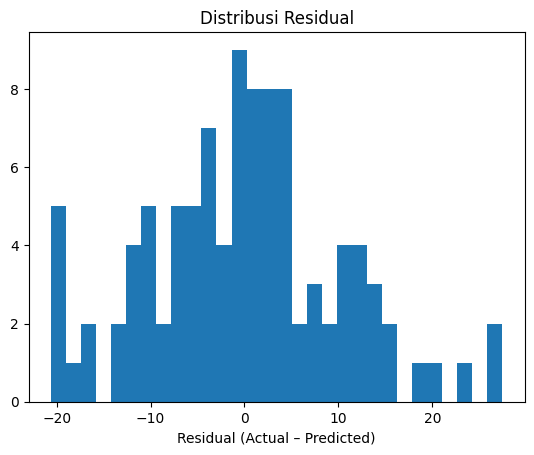

In [7]:
# 2. Residual Distribution
residuals = y_test - y_pred
plt.figure()
plt.hist(residuals, bins=30)
plt.xlabel("Residual (Actual – Predicted)")
plt.title("Distribusi Residual")
plt.show()

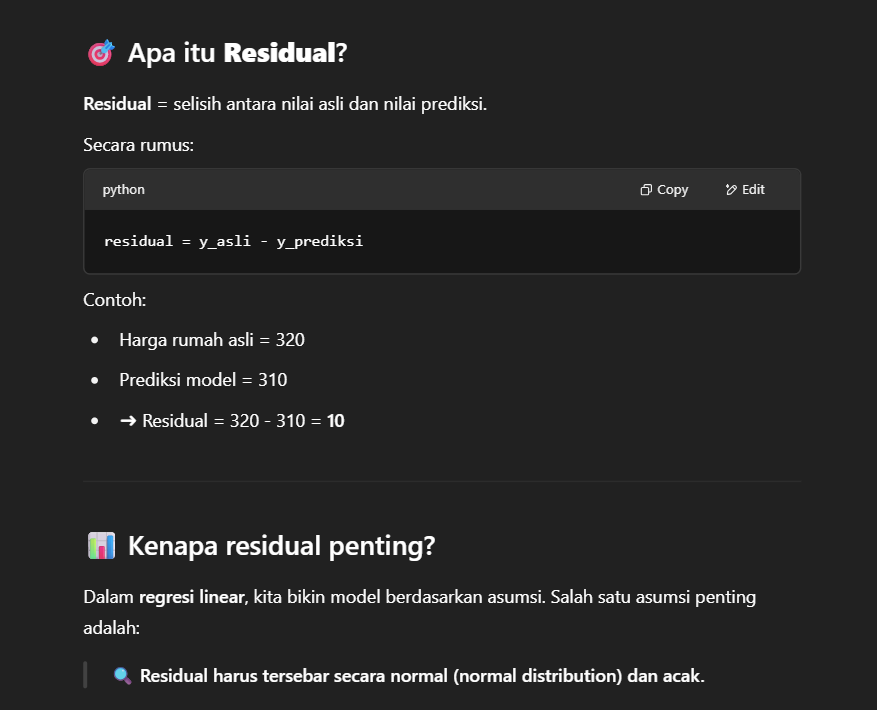

> Kalau histogram-nya bentuknya seperti lonceng (mirip distribusi normal) → bagus ✅

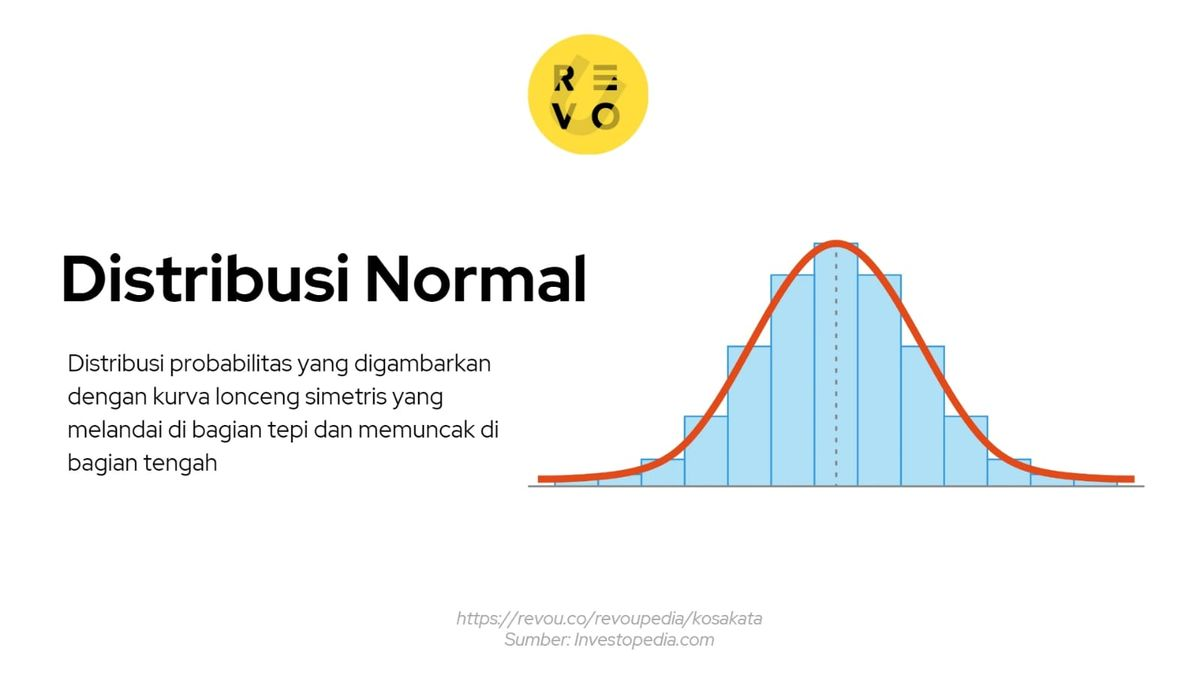

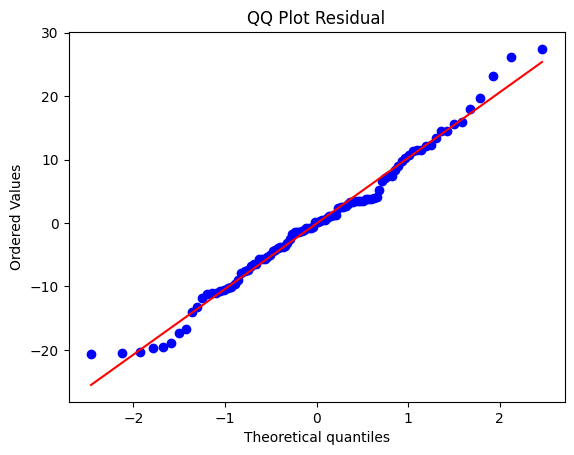

In [8]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot Residual")
plt.show()


> Kalau titik-titiknya mengikuti garis lurus → berarti residual terdistribusi normal ✅



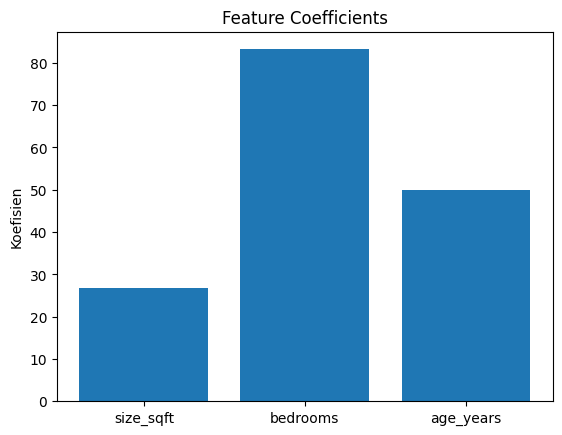

In [9]:
# 3. Koefisien Model (Bar Chart)
features = ["size_sqft", "bedrooms", "age_years"]
coefs = model.coef_
plt.figure()
plt.bar(features, coefs)
plt.ylabel("Koefisien")
plt.title("Feature Coefficients")
plt.show()

> Coefficients: interpretasi kontribusi tiap fitur



## Menyimpan Model

In [10]:
import joblib
# Pastikan folder 'models/' sudah ada
joblib.dump(model, "../models/linear_regression_model.pkl")
print("Model disimpan di models/linear_regression_model.pkl")


Model disimpan di models/linear_regression_model.pkl
